# Multivariate Student T distribution



In [7]:
"""
import relevant packages
"""

# for working with arrays
import numpy as np

# for working with distributions
from scipy import stats

# plotting functionality
import matplotlib.pyplot as plt

## Problem 1

The multivariate Student T distribution $\mathbf{X} \sim t(\boldsymbol{\mu}, \boldsymbol{\Sigma}, \nu)$ can be simulated using  [`scipy.stats.multivariate_t`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_t.html#scipy.stats.multivariate_t) and has the density

$$
f_{\mathbf{X}}({\mathbf{x}})  = \frac{\Gamma\left[(\nu+p)/2\right]}{\Gamma(\nu/2)\nu^{p/2}\pi^{p/2}\left|{\boldsymbol\Sigma}\right|^{1/2}}\left[1+\frac{1}{\nu}({\mathbf x}-{\boldsymbol\mu})^{\rm T}{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})\right]^{-(\nu+p)/2}
$$

where $p$ is the length of the random vector, $\nu$ is the degree of freedoms, $\boldsymbol{\mu}$ is a $p \times 1$ vector and $\boldsymbol{\Sigma}$ is a $p \times p$ positive definite matrix. 

The expected value is given by (if $\nu > 1$)

$$
\text{E} [\mathbf{X}] = \boldsymbol{\mu}
$$

and the covariance matrix (if $\nu > 2$)

$$
\text{Cov} [\mathbf{X}] = \frac{\nu}{\nu - 2} \boldsymbol{\Sigma}
$$

Validate the formula for a bivariate multivariate t distribution with $\boldsymbol{\mu} = (0, 0)^\top$, $\boldsymbol{\Sigma} = \mathbb{I}_2$ and $\nu = 10$ using simulation. Use at least 999 999 simulations. 

### Solution

In [8]:
"""
Define inputs and calculate theoretical values
"""

# dimension of random vector
p = 2
# degrees of freedom
nu = 10
# mean vector
mu = np.zeros(p)
# scale matrix
sigma_mat = np.eye(p)
# covariance matrix
cov_mat = nu /  (nu - 2) * sigma_mat

In [9]:
"""
Validation using simulations
"""

# number of simulations
num_sim = 9_999_999

# simulate data
sim_data = stats.multivariate_t(loc=mu, shape=sigma_mat, df=nu).rvs(size=num_sim)

# estimate mean and covariance matrix
mu_est = np.mean(sim_data, axis=0)
cov_mat_est = np.cov(sim_data.T, ddof=0)

In [10]:
# estimate of mean vector
mu_est

array([-7.90649841e-05, -5.04359363e-05])

In [11]:
# estimate of covariance matrix
cov_mat_est

array([[1.25027802e+00, 3.00701314e-04],
       [3.00701314e-04, 1.25192863e+00]])

In [12]:
# true covariance matrix
cov_mat

array([[1.25, 0.  ],
       [0.  , 1.25]])

## Problem 2

Consider the case with $p = 100$ with $\boldsymbol{\mu} = \mathbf{0}$ and $\boldsymbol{\Sigma} = \mathbb{I}_p$. 

Verify using simulations that $\sum_{i=1}^p X_i = \mathbf{1}^\top \mathbf{X} \sim t(0, p, \nu)$. 


### Solution

In [13]:
"""
Define inputs
"""

# dimension of random vector
p = 100
# degrees of freedom
nu = 10
# mean vector
mu = np.zeros(p)
# scale matrix
sigma_mat = np.eye(p)
# covariance matrix
cov_mat = nu /  (nu - 2) * sigma_mat

In [14]:
"""
Simulate sum of uncorrelated t distributed variables
"""

# number of simulations
num_sim = 9_999_999

# simulate data
sim_data = stats.multivariate_t(loc=mu, shape=sigma_mat, df=nu).rvs(size=num_sim)
# sum of variables of simulated data
sim_sum = np.sum(sim_data, axis=1)

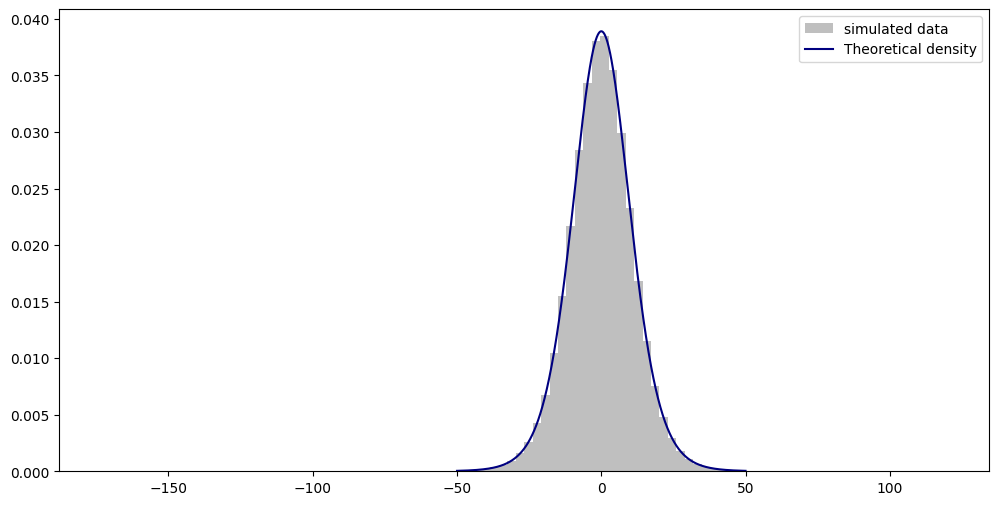

In [15]:
"""
Define pdf values
"""

# x values for pdf
x_vals = np.linspace(-50, 50, 1000)
# pdf values
pdf_vals = stats.t(loc=0, scale=np.sqrt(p), df=nu).pdf(x_vals)

"""
Plot results
"""

fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(sim_sum, bins=100, color="gray", density=True, alpha=0.5, label="simulated data")
ax.plot(x_vals, pdf_vals, label='Theoretical density', color="navy")

ax.legend()

plt.show()

## Problem 3

For the above cases the marginal distribution will be $X_i \sim t(0, 1, \nu)$. Verify that uncorrelated Student t distributed variables cannot be independent by simulating $\sum_{i=1}^p Y_i$ with $Y_i \sim t(0, 1, \nu)$ and comparing the histogram with the theoretical distribution derived above. Additionally, try to add the pdf of a $N(0, p \frac{\nu}{\nu - 2})$ random variable. 


### Solution

In [16]:
"""
Simulate sum of independent t distributed variables
"""

# number of simulations
num_sim = 9_999_999

# simulate data
sim_data_independent = stats.t(loc=0, scale=1, df=nu).rvs(size=(num_sim, p))
sim_sum_independent = np.sum(sim_data_independent, axis=1)

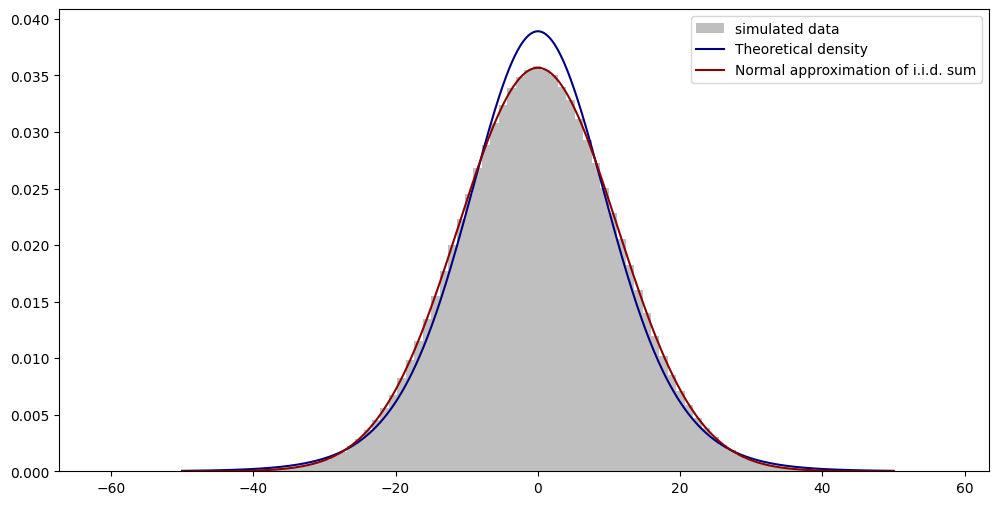

In [17]:
"""
Define pdf values
"""

# x values for pdf
x_vals = np.linspace(-50, 50, 1000)
# pdf values
pdf_vals = stats.t(loc=0, scale=np.sqrt(p), df=nu).pdf(x_vals)
pdf_norm_vals = stats.norm(loc=0, scale=np.sqrt(p * nu / (nu - 2))).pdf(x_vals)

"""
Plot results
"""

fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(sim_sum_independent, bins=100, color="gray", density=True, alpha=0.5, label="simulated data")
ax.plot(x_vals, pdf_vals, label='Theoretical density', color="navy")
ax.plot(x_vals, pdf_norm_vals, label='Normal approximation of i.i.d. sum', color="darkred")

ax.legend()

plt.show()